In [1]:
import os
from typing import List, Union

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from graph_state.graph_state import *
from matplotlib.ticker import (  # Added FuncFormatter
    FuncFormatter,
    MultipleLocator,
)


Saved comparison plot to: plots/comparison_plot_8q_non-overlapped.png


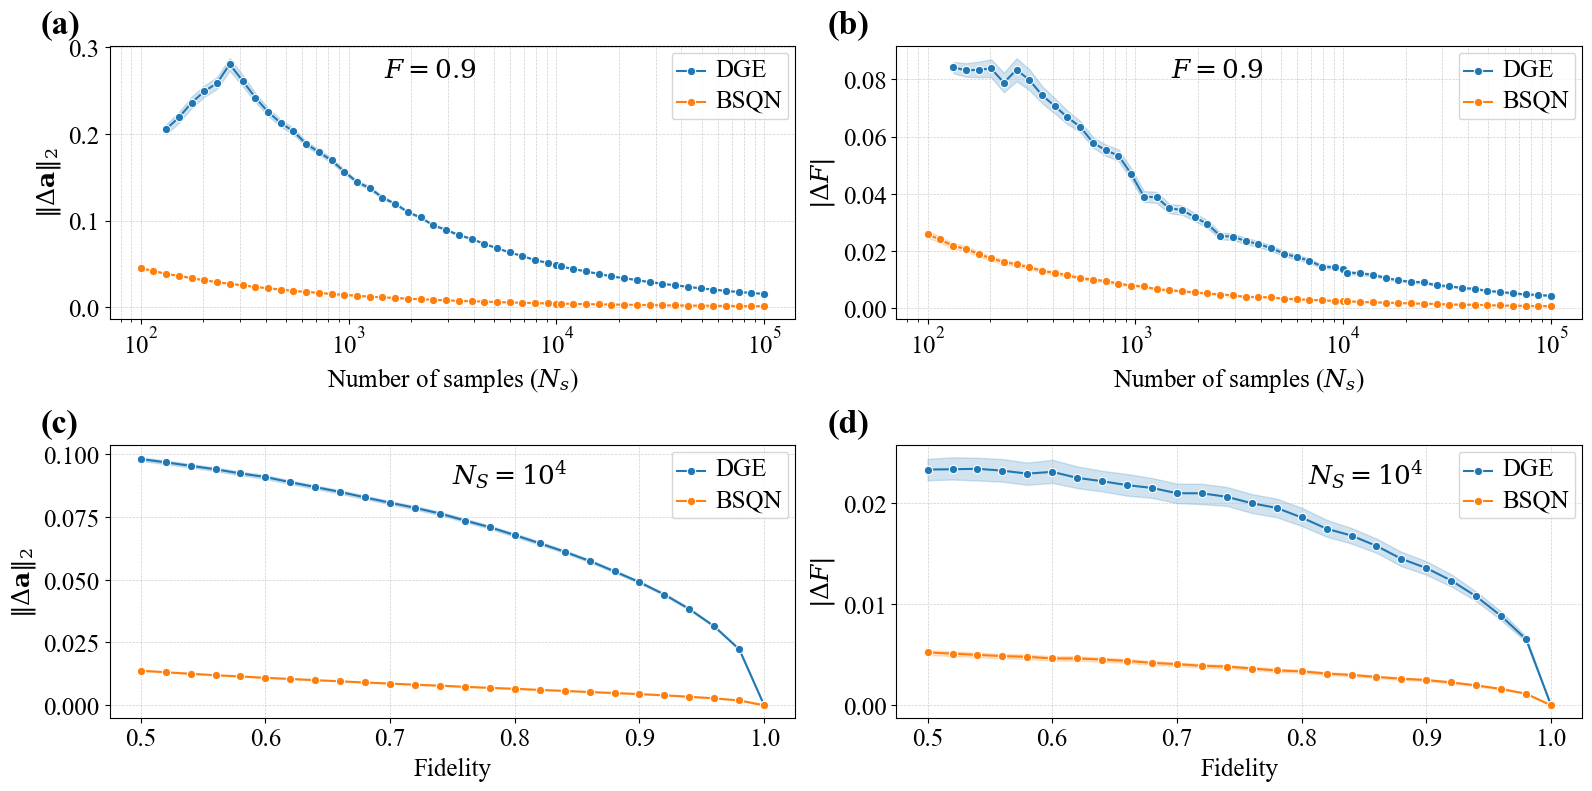

In [2]:
def plot_comparison_results(
    tomo_df: pd.DataFrame,
    bell_diag_df: pd.DataFrame,
    num_qubits: int,
    fixed_fidelity: float,
    fixed_shots: int,
    title_fontsize: int = 19,
    label_fontsize: int = 18,
    legend_fontsize: int = 18,
    tick_fontsize: int = 18,
    legend_mapping: dict = None,
    filename_suffix: str = None,
    ):
    """
    Generates a 2x2 comparison plot with customizable fonts and legends.
    """
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['mathtext.fontset'] = 'dejavuserif'
    
    # Combine the two dataframes for easier plotting with seaborn's 'hue'
    combined_df = pd.concat([tomo_df, bell_diag_df], ignore_index=True)
    
    if combined_df.empty:
        print("No data found for plotting.")
        return

    # If a mapping is provided, rename the prefixes for a cleaner legend.
    # Otherwise, use the original prefixes.
    if legend_mapping:
        combined_df['prefix'] = combined_df['prefix'].map(legend_mapping)

    # Filter data for the specified number of qubits
    combined_df = combined_df[combined_df['qubits'] == num_qubits].copy()

    # Filter data for the two main experiment types
    df_exp1 = combined_df[combined_df['input_fidelity'] == fixed_fidelity].copy()
    df_exp1 = df_exp1[df_exp1['total_shots'] <= 10**5].copy()
    # df_exp1 = df_exp1[df_exp1['total_shots'] >= 10**3].copy()

    df_exp2 = combined_df[combined_df['total_shots'] == fixed_shots].copy()

    fig, axes = plt.subplots(2, 2, figsize=(16, 8))
    # fig.suptitle(f'Performance comparison between BSQN and DGE on complete graph ($n = {num_qubits}$)', fontsize=22)

    # Add labels (a), (b), (c), (d) to the subplots
    subplot_labels = ['(a)', '(b)', '(c)', '(d)']
    label_font_props = {'fontsize': title_fontsize * 1.3, 'fontweight': 'bold', 'fontfamily': 'Times New Roman'}
    for i, ax in enumerate(axes.flatten()):
        ax.text(-0.1, 1.05, subplot_labels[i], transform=ax.transAxes, **label_font_props)

    # --- Row 1: Varying Shots ---
    ax1, ax2 = axes[0, 0], axes[0, 1]
    
    sns.lineplot(data=df_exp1, x="total_shots", y="delta_a_norm_2", hue="prefix", ax=ax1, marker='o')
    # ax1.set_title(f"Error Norm vs. Number of Samples (Input F={fixed_fidelity})", fontsize=title_fontsize)
    ax1.text(0.4, 0.95, f"$F = {fixed_fidelity}$",
             transform=ax1.transAxes, fontsize=title_fontsize, verticalalignment='top')
    ax1.set_xlabel("Number of samples ($N_s$)", fontsize=label_fontsize)
    ax1.set_ylabel(r"$\Vert\Delta \mathbf{a}\Vert_2$", fontsize=label_fontsize)
    ax1.set_xscale("log")

    sns.lineplot(data=df_exp1, x="total_shots", y="delta_fidelity", hue="prefix", ax=ax2, marker='o')
    # ax2.set_title(f"Fidelity Error vs. Number of Samples (Input F={fixed_fidelity})", fontsize=title_fontsize)
    ax2.text(0.4, 0.95, f"$F = {fixed_fidelity}$",
             transform=ax2.transAxes, fontsize=title_fontsize, verticalalignment='top')
    ax2.set_xlabel("Number of samples ($N_s$)", fontsize=label_fontsize)
    ax2.set_ylabel(r"$\vert\Delta F\vert$", fontsize=label_fontsize)
    ax2.set_xscale("log")

    # --- Row 2: Varying Input Fidelity ---
    ax3, ax4 = axes[1, 0], axes[1, 1]
    
    sns.lineplot(data=df_exp2, x="input_fidelity", y="delta_a_norm_2", hue="prefix", ax=ax3, marker='o')
    # ax3.set_title(f"2-Norm vs. Fidelity (Shots={fixed_shots})", fontsize=title_fontsize)
    ax3.text(0.5, 0.95, f"$N_S = 10^4$",
             transform=ax3.transAxes, fontsize=title_fontsize, verticalalignment='top')
    ax3.set_xlabel("Fidelity", fontsize=label_fontsize)
    ax3.set_ylabel(r"$\Vert\Delta \mathbf{a}\Vert_2$", fontsize=label_fontsize)

    sns.lineplot(data=df_exp2, x="input_fidelity", y="delta_fidelity", hue="prefix", ax=ax4, marker='o')
    # ax4.set_title(f"Estimated Fidelity vs. Input Fidelity (Shots={fixed_shots})", fontsize=title_fontsize)
    ax4.text(0.6, 0.95, f"$N_S = 10^{{{int(np.log10(fixed_shots))}}}$",
             transform=ax4.transAxes, fontsize=title_fontsize, verticalalignment='top')
    ax4.set_xlabel("Fidelity", fontsize=label_fontsize)
    ax4.set_ylabel(r"$\vert\Delta F\vert$", fontsize=label_fontsize)

    for ax in axes.flatten():
        # Set tick font size
        ax.tick_params(axis='x', labelsize=tick_fontsize)
        ax.tick_params(axis='y', labelsize=tick_fontsize)
        ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)

        # Customize legend
        legend = ax.get_legend()
        if legend:
            legend.set_title(None) # This line removes the legend title
            plt.setp(legend.get_texts(), fontsize=legend_fontsize)

    plt.tight_layout(pad=1)
    
    # Ensure plots directory exists
    os.makedirs("plots", exist_ok=True)
    plot_filename = os.path.join("plots", f"comparison_plot_{num_qubits}q{ '_' + filename_suffix if filename_suffix else ''}.pdf")
    plt.savefig(plot_filename, dpi=300)
    plot_filename = os.path.join("plots", f"comparison_plot_{num_qubits}q{ '_' + filename_suffix if filename_suffix else ''}.png")
    plt.savefig(plot_filename, dpi=300)
    print(f"\nSaved comparison plot to: {plot_filename}")


base_path = 'simulation_data/processed_csv'
dge_df = pd.read_csv(f'{base_path}/performance_analysis_dge_overlapped.zip')
bsqn_df = pd.read_csv(f'{base_path}/performance_analysis_bsqn.zip')

plot_comparison_results(dge_df, bsqn_df, 8, 0.9, 10_000, filename_suffix='non-overlapped', legend_mapping={
    'DGE': 'DGE',
    'BSQN': 'BSQN',
})

['DGE' 'BSQN']


<>:79: SyntaxWarning: invalid escape sequence '\m'
<>:79: SyntaxWarning: invalid escape sequence '\m'
/var/folders/2j/j63y2mx97lqg43npqy6xqc500000gn/T/ipykernel_393/2503292973.py:79: SyntaxWarning: invalid escape sequence '\m'
  ax.set_title('Complete graph (F = 0.9) under depolarizing noise $(\mathcal{N}_1)$', fontsize=22)



Saved comparison plot to: plots/comparison_plot_varying_size_F0.9.png


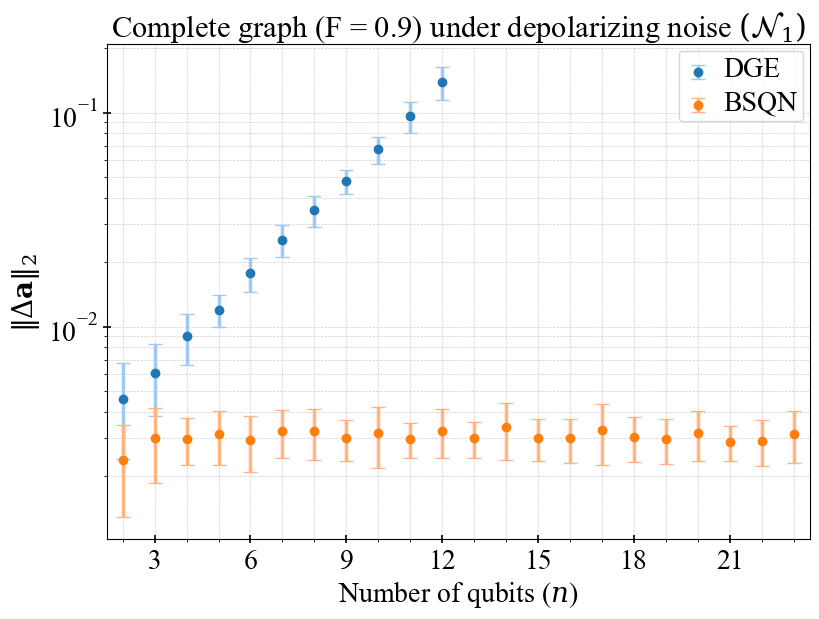

In [3]:
def plot_diag_est_varying_size(
    tomo_df: pd.DataFrame,
    bell_diag_df: pd.DataFrame,
    fixed_fidelity: float,
    fixed_shots: int,
    title_fontsize: int = 19,
    label_fontsize: int = 20,
    legend_fontsize: int = 20,
    tick_fontsize: int = 20,
    legend_mapping: dict = None,
    error_bar: Union[str, tuple] = 'sd',
    err_style: str = 'bars',
    ):

    plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['mathtext.fontset'] = 'dejavuserif'
    color_list = sns.color_palette("Paired")
    blue = sns.color_palette("Blues", 14)
    yellow = sns.color_palette("YlOrBr", 14)
    palette = sns.color_palette()

    # Apply the specific data cuts for each dataframe
    tomo_df_filtered = tomo_df[tomo_df['qubits'] <= 12]
    bell_diag_df_filtered = bell_diag_df[bell_diag_df['qubits'] <= 30]

    # Combine the two dataframes for easier plotting with seaborn's 'hue'
    combined_df = pd.concat([tomo_df_filtered, bell_diag_df_filtered], ignore_index=True)
    
    if combined_df.empty:
        print("No data found for plotting.")
        return

    # If a mapping is provided, rename the prefixes for a cleaner legend.
    if legend_mapping:
        combined_df['prefix'] = combined_df['prefix'].map(legend_mapping)

    # Filter data for the fixed experimental parameters
    df_exp = combined_df[combined_df['input_fidelity'] == fixed_fidelity].copy()
    df_exp = df_exp[df_exp['total_shots'] == fixed_shots].copy()

    # fig, ax = plt.subplots(figsize=(8, 6))
    fig, ax = plt.subplots(figsize=(8, 6))
    # palette = sns.color_palette("colorblind", n_colors=len(df_exp['prefix'].unique()))

    # print debug
    print(df_exp['prefix'].unique())

    color_map = {prefix: color for prefix, color in zip(reversed(sorted(df_exp['prefix'].unique())), palette)}
    efactor = 0.8
    e_color_map = {prefix: (efactor * color[0], efactor * color[1], efactor * color[2]) for prefix, color in zip(reversed(sorted(df_exp['prefix'].unique())), palette)}
    e_color_map = {prefix: color for prefix, color in zip(reversed(sorted(df_exp['prefix'].unique())), sns.color_palette('pastel'))}

    
    # Plot the main data with specified error bar style
    # sns.lineplot(data=df_exp, x="qubits", y="delta_a_norm_2", linestyle='', hue="prefix", ax=ax, marker='o', errorbar=error_bar, err_style=err_style)
    for prefix, color in color_map.items():
        subset = df_exp[df_exp['prefix'] == prefix]
        if not subset.empty:
            grouped = subset.groupby('qubits')['delta_a_norm_2']
            mean_vals = grouped.mean()
            std_vals = grouped.std()
            # print(f'label = {prefix}')
            ax.errorbar(mean_vals.index, mean_vals.values, yerr=std_vals.values,
                        marker='o', capsize=5, color=color, ecolor=e_color_map[prefix], label=prefix, linestyle='', elinewidth=2.5)
    
    ax.set_xlabel("Number of qubits ($n$)", fontsize=label_fontsize)
    ax.set_ylabel(r"$\Vert\Delta \mathbf{a}\Vert_2$", fontsize=label_fontsize)
    
    # Ensure x-axis ticks are integers
    min_q = df_exp['qubits'].min()
    max_q = df_exp['qubits'].max()
    ax.set_xlim(min_q - 0.5, max_q + 0.5)

    # Customize ticks and legend
    ax.tick_params(axis='x', labelsize=tick_fontsize)
    ax.tick_params(axis='y', labelsize=tick_fontsize)
    ax.tick_params(axis='both', which='major', labelsize=tick_fontsize, direction='inout', length=6, width=1.2)
    # sns.set_style('ticks')  # white style with tick marks
    ax.set_title('Complete graph (F = 0.9) under depolarizing noise $(\mathcal{N}_1)$', fontsize=22)
    # ax.text(0.4, 0.95, f"$N_S = 10^4$",
            #  transform=ax.transAxes, fontsize=title_fontsize, verticalalignment='top')
    ax.set_yscale('log')
    
    # ax.xaxis.set_major_locator(MaxNLocator(integer=True, min_n_ticks=1))
    ax.xaxis.set_major_locator(MultipleLocator(3))
    ax.xaxis.set_minor_locator(MultipleLocator(1))

    ax.grid(True, which='both', axis='x', linestyle='--', linewidth=0.5, alpha=0.6)
    ax.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5, alpha=0.6) # Major and minor for y log scale

    ax.legend()
    legend = ax.get_legend()
    if legend:
        # sns.move_legend(ax, "center right")
        legend.set_title(None)
        plt.setp(legend.get_texts(), fontsize=legend_fontsize)

    
    # plt.tight_layout(pad=1.0)
    plt.tight_layout(pad=0)
    
    # Ensure plots directory exists
    os.makedirs("plots", exist_ok=True)
    plot_filename = os.path.join("plots", f"comparison_plot_varying_size_F{fixed_fidelity}.pdf")
    plt.savefig(plot_filename, dpi=300)
    plot_filename = os.path.join("plots", f"comparison_plot_varying_size_F{fixed_fidelity}.png")
    plt.savefig(plot_filename, dpi=300)
    print(f"\nSaved comparison plot to: {plot_filename}")

# tomo_df = load_data_for_plotting('data-new/scalability/dge_group_overlapped', 'tomo')
# bell_diag_df = load_data_from_scalability_exp('data-new/scalability/bsqn', 'bell_scalability')
base_path = 'simulation_data/processed_csv'
dge_df = pd.read_csv(f'{base_path}/scalability_analysis_dge_overlapped.zip')
bsqn_df = pd.read_csv(f'{base_path}/scalability_analysis_bsqn.zip')

plot_diag_est_varying_size(dge_df, bsqn_df, 0.9, 20_000, legend_mapping={
    'DGE': 'DGE',
    'BSQN': 'BSQN',
})

<>:132: SyntaxWarning: invalid escape sequence '\m'
<>:133: SyntaxWarning: invalid escape sequence '\m'
<>:134: SyntaxWarning: invalid escape sequence '\m'
<>:132: SyntaxWarning: invalid escape sequence '\m'
<>:133: SyntaxWarning: invalid escape sequence '\m'
<>:134: SyntaxWarning: invalid escape sequence '\m'
/var/folders/2j/j63y2mx97lqg43npqy6xqc500000gn/T/ipykernel_393/2100996721.py:132: SyntaxWarning: invalid escape sequence '\m'
  'depolarizing': 'Depolarizing $(\mathcal{N}_1)$',
/var/folders/2j/j63y2mx97lqg43npqy6xqc500000gn/T/ipykernel_393/2100996721.py:133: SyntaxWarning: invalid escape sequence '\m'
  'single-qubit-dephasing': 'Single-qubit dephasing $(\mathcal{N}_2)$',
/var/folders/2j/j63y2mx97lqg43npqy6xqc500000gn/T/ipykernel_393/2100996721.py:134: SyntaxWarning: invalid escape sequence '\m'
  'bimodal': 'Bimodal $(\mathcal{N}_3)$'



Saved plot to: plots/fidelity_vs_qubits_shaded.pdf


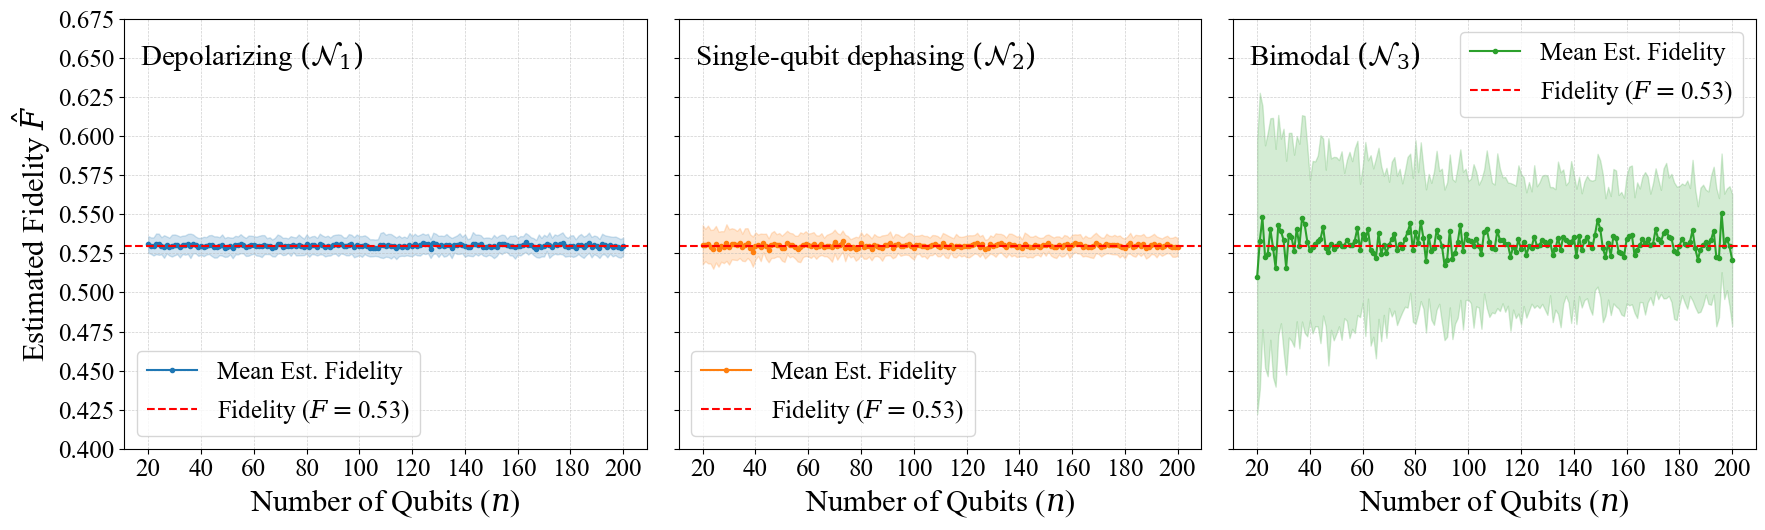

In [4]:
def plot_fidelity_vs_qubits(
    fidelity_df: pd.DataFrame,
    fixed_shots: int,
    error_models: List[str],
    font_family: str = 'Times New Roman',
    mathtext_fontset: str = 'dejavuserif',
    capsize: int = 6, # Changed default capsize to 6
    legend_mapping: dict = None # Added legend_mapping
    ):
    """
    Plots fidelity vs. number of qubits for different error models,
    using shaded error regions and global font settings.
    (Plot 1, revised style)
    """
    # --- Set global font sizes using rcParams ---
    label_fontsize = 22
    title_fontsize = 21
    tick_fontsize = 18
    legend_fontsize = 18
    plt.rcParams['font.size'] = 18          # Default font size
    plt.rcParams['axes.labelsize'] = label_fontsize
    plt.rcParams['axes.titlesize'] = title_fontsize
    plt.rcParams['xtick.labelsize'] = tick_fontsize
    plt.rcParams['ytick.labelsize'] = tick_fontsize
    plt.rcParams['legend.fontsize'] = legend_fontsize
    plt.rcParams['font.family'] = font_family
    plt.rcParams['mathtext.fontset'] = mathtext_fontset
    
    num_err_models = len(error_models)
    fig, axes = plt.subplots(1, num_err_models, figsize=(6 * num_err_models, 6), sharey=True) # Adjusted figsize
    if num_err_models == 1:
        axes = [axes] # Make it iterable if only one
    
    # Define colors
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c'] # Use the example colors
    if len(colors) < num_err_models:
        # Fallback to a palette if not enough defined colors
        colors = sns.color_palette("colorblind", num_err_models)
        
    for ax, err_model, color in zip(axes, error_models, colors):
        # Filter for this subplot: 2n stabilizers and specific error model
        df_plot = fidelity_df[
            (fidelity_df['error_model'] == err_model) &
            (fidelity_df['shots'] == fixed_shots) &
            (fidelity_df['numstab'] == fidelity_df['qubits'] * 2)
        ].copy()
        
        if df_plot.empty:
            ax.text(0.5, 0.5, "(No data)", transform=ax.transAxes,
                    ha='center', va='center', fontsize=title_fontsize)
            # Use mapped title if available, otherwise use original
            display_title = legend_mapping.get(err_model, err_model.replace('-', ' ').title()) if legend_mapping else err_model.replace('-', ' ').title()
            ax.set_title(display_title, fontsize=title_fontsize) # Keep title for context
            continue
            
        # Group by qubits to get mean/std of estimated fidelity
        grouped = df_plot.groupby('qubits')['estimated_fidelity']
        mean_fid = grouped.mean()
        std_fid = grouped.std()
        
        # --- Plotting using ax.plot and ax.fill_between ---
        x_values = mean_fid.index
        y_means = mean_fid.values
        y_stds = std_fid.values

        # Plot the mean estimated fidelity line
        ax.plot(x_values, y_means, 'o-', color=color, markersize=3, label='Mean Est. Fidelity')
        
        # Plot the shaded envelope (1 standard deviation)
        ax.fill_between(x_values, y_means - y_stds, y_means + y_stds, 
                        color=color, alpha=0.2, 
                        # label='Std Dev Envelope' # Usually label only the mean line
                        )
        
        # Plot the true fidelity (input_fidelity) as a reference line
        # Assuming true fidelity is constant for this plot
        true_fidelity_val = df_plot['input_fidelity'].iloc[0]
        ax.axhline(y=true_fidelity_val, color='r', linestyle='--', linewidth=1.5, label=f'Fidelity ($F =${true_fidelity_val:.2f})') # Formatted true fidelity

        # Put title inside the plot, using mapped name if available
        display_title = legend_mapping.get(err_model, err_model.replace('_', ' ').title()) if legend_mapping else err_model.replace('_', ' ').title()
        # Adjust position based on title length slightly
        x_pos = 0.05 if len(display_title) <= 14 else 0.03
        ax.text(x_pos, 0.95, display_title, transform=ax.transAxes,
                fontsize=title_fontsize, verticalalignment='top',
                # fontweight='bold' # Optional: make title bold
                )

        ax.set_xlabel("Number of Qubits ($n$)")
        
        # Set x-ticks in steps of 20 (as requested in prompt, adjust if needed)
        if not mean_fid.empty:
            min_q = x_values.min()
            max_q = x_values.max()
            # Ensure ticks start near min_q and go up to max_q
            start_tick = np.ceil(min_q / 20.0) * 20
            ax.set_xticks(np.arange(start_tick, max_q + 1, 20))
        
        ax.legend()
        
        # Add grid and set y-ticks
        ax.grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.6)
        if not mean_fid.empty:
            y_min = (y_means - y_stds).min()
            y_max = (y_means + y_stds).max()
            y_min = min(y_min, true_fidelity_val)
            y_max = max(y_max, true_fidelity_val)
            
            # Set y-ticks in steps of 0.025
            y_min_rounded = np.floor(y_min / 0.025) * 0.025
            y_max_rounded = np.ceil(y_max / 0.025) * 0.025
            # Add small buffer to avoid clipping envelope
            ax.set_yticks(np.arange(y_min_rounded, y_max_rounded + 0.035, 0.025))


    axes[0].set_ylabel(r"Estimated Fidelity $\hat{F}$")
    # No suptitle needed as titles are inside plots now
    # fig.suptitle(f"Fidelity Estimation vs. System Size (Shots={fixed_shots}, Stabilizers=2n)", fontsize=plt.rcParams['figure.titlesize'])
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.97]) # Adjust rect slightly if needed
    
    os.makedirs("plots", exist_ok=True)
    plot_filename = os.path.join("plots", "fidelity_vs_qubits_shaded.pdf") # Changed filename
    plt.savefig(plot_filename, dpi=300, bbox_inches='tight')
    print(f"\nSaved plot to: {plot_filename}")

# df = load_all_fidelity_data('bell_fidelity_data')
base_path = 'simulation_data/processed_csv'
bsqn_df = pd.read_csv(f'{base_path}/random_sampling_fidelity_estimation_bsqn.zip')

plot_fidelity_vs_qubits(bsqn_df, 5000, ['depolarizing', 'single-qubit-dephasing', 'bimodal'], legend_mapping={
    'depolarizing': 'Depolarizing $(\mathcal{N}_1)$', 
    'single-qubit-dephasing': 'Single-qubit dephasing $(\mathcal{N}_2)$', 
    'bimodal': 'Bimodal $(\mathcal{N}_3)$'
})

<>:262: SyntaxWarning: invalid escape sequence '\m'
<>:263: SyntaxWarning: invalid escape sequence '\m'
<>:264: SyntaxWarning: invalid escape sequence '\m'
<>:262: SyntaxWarning: invalid escape sequence '\m'
<>:263: SyntaxWarning: invalid escape sequence '\m'
<>:264: SyntaxWarning: invalid escape sequence '\m'
/var/folders/2j/j63y2mx97lqg43npqy6xqc500000gn/T/ipykernel_393/3857741338.py:262: SyntaxWarning: invalid escape sequence '\m'
  'depolarizing': 'Depolarizing $(\mathcal{N}_1)$',
/var/folders/2j/j63y2mx97lqg43npqy6xqc500000gn/T/ipykernel_393/3857741338.py:263: SyntaxWarning: invalid escape sequence '\m'
  'single-qubit-dephasing': 'Single qubit dephasing $(\mathcal{N}_2)$',
/var/folders/2j/j63y2mx97lqg43npqy6xqc500000gn/T/ipykernel_393/3857741338.py:264: SyntaxWarning: invalid escape sequence '\m'
  'bimodal': 'Bimodal $(\mathcal{N}_3)$'



Saved combined std dev plot to: plots/fidelity_std_dev_combined_n40.pdf


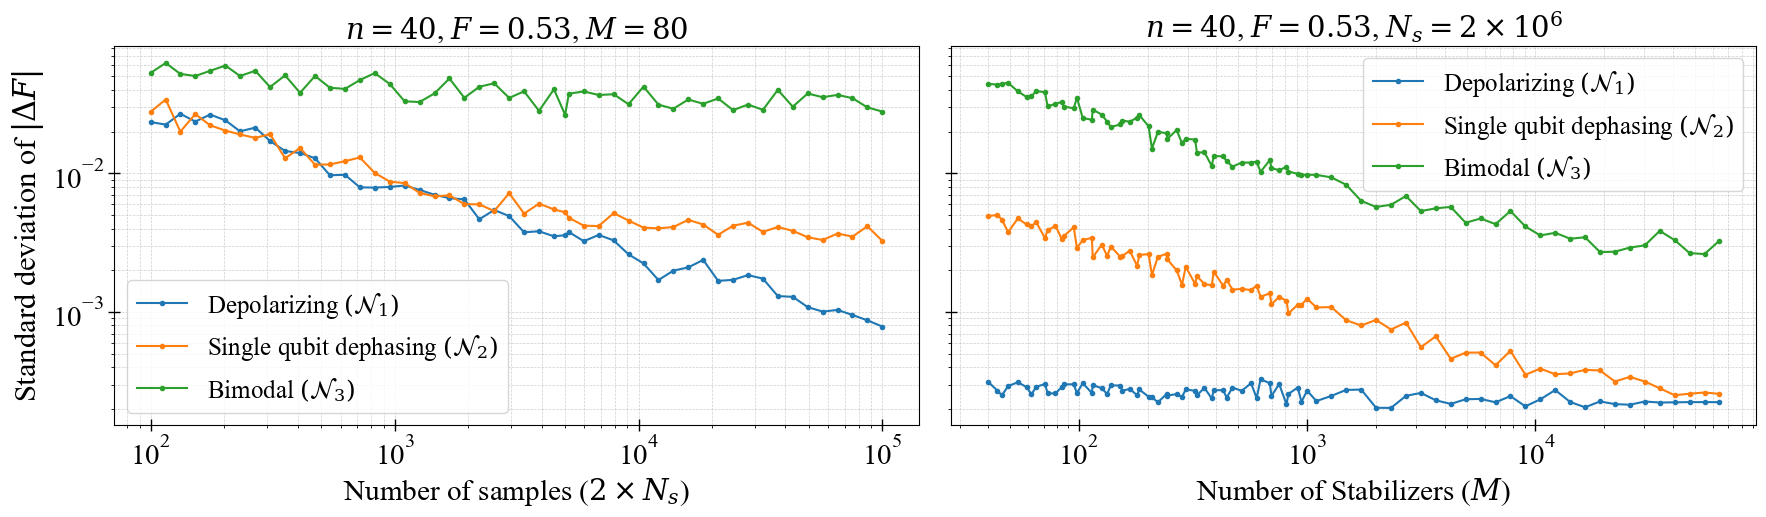

In [5]:
def plot_fidelity_std_dev_combined_new(
    fidelity_df: pd.DataFrame,
    fixed_shots: int,
    fixed_qubits: int,
    error_models: List[str],
    font_family: str = 'Times New Roman',
    mathtext_fontset: str = 'dejavuserif',
    legend_mapping: dict = None # Added legend mapping
    ):
    """
    Plots the standard deviation of fidelity error in a 1x2 grid,
    combining error models onto the same axes.
    (Plot 3, new function)
    """
    # --- Set global font sizes using rcParams ---
    label_fontsize = 19
    title_fontsize = 21
    tick_fontsize = 21 # Increased tick font size as requested in follow-up
    legend_fontsize = 18
    plt.rcParams['font.size'] = 18          # Default font size
    plt.rcParams['axes.labelsize'] = label_fontsize
    # plt.rcParams['axes.titlesize'] = title_fontsize # Titles are now inside plots
    plt.rcParams['xtick.labelsize'] = tick_fontsize
    plt.rcParams['ytick.labelsize'] = tick_fontsize
    plt.rcParams['legend.fontsize'] = legend_fontsize
    plt.rcParams['font.family'] = font_family
    plt.rcParams['mathtext.fontset'] = mathtext_fontset
    
    fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True) # 1 row, 2 columns, Increased width slightly
    
    # Define colors
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c'] # Use the example colors
    if len(colors) < len(error_models):
        # Fallback to default cycle if not enough defined colors
        prop_cycle = plt.rcParams['axes.prop_cycle']
        colors = prop_cycle.by_key()['color']
        
    # --- Left Plot: Varying Shots (Fixed Stabilizers = 2n) ---
    ax_left = axes[0]
    for err_model, color in zip(error_models, colors):
        df_plot_left = fidelity_df[
            (fidelity_df['error_model'] == err_model) &
            (fidelity_df['qubits'] == fixed_qubits) &
            (fidelity_df['numstab'] == fixed_qubits * 2)
        ].copy()
        
        if df_plot_left.empty:
            print(f"No data for {err_model} in left plot.")
            continue
            
        grouped_std_left = df_plot_left.groupby('shots')['fidelity_error'].std()
        x_values_left = grouped_std_left.index
        y_means_left = grouped_std_left.values
        
        label = legend_mapping.get(err_model, err_model.replace('_', ' ').title()) if legend_mapping else err_model.replace('_', ' ').title()
        ax_left.plot(x_values_left, y_means_left, 'o-', color=color, markersize=3, label=label)
        # ax_left.fill_between(...) # Shaded error omitted for simplicity
        
    # ax_left.text(0.05, 0.95, f"Varying Shots (Stabilizers=2n, n={fixed_qubits})",
            #  transform=ax_left.transAxes, fontsize=title_fontsize, verticalalignment='top')
    ax_left.set_title(f"$n = {fixed_qubits}$, $F = 0.53$, $M = {2*fixed_qubits}$") # Updated title
    ax_left.set_xlabel("Number of samples ($N_s$) - Data Value", fontsize=label_fontsize + 2) # Label indicates data value
    ax_left.set_ylabel(r"Standard deviation of $\vert \Delta F\vert$", fontsize=22)
    ax_left.set_xscale("log")
    ax_left.set_yscale("log")
    ax_left.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)
    ax_left.legend()
    # Apply tick parameters specifically here
    ax_left.tick_params(axis='both', which='major', direction='inout', length=8, width=1) # Direction inout, increased length

    # --- Custom Tick Formatter for Left X-axis ---
    def format_ticks(x, pos):
        """Formats tick value x into '2 x 10^k'"""
        doubled_x = 2 * x
        if doubled_x <= 0:
            return "" # Avoid log(0) issues
        exponent = int(np.floor(np.log10(doubled_x)))
        # Format as 2x10^k
        return rf'$2 \times 10^{{{exponent}}}$'

    ax_left.xaxis.set_major_formatter(FuncFormatter(format_ticks))

    # --- Right Plot: Varying Stabilizers (Fixed Shots) ---
    ax_right = axes[1]
    for err_model, color in zip(error_models, colors):
        df_plot_right = fidelity_df[
            (fidelity_df['error_model'] == err_model) &
            (fidelity_df['qubits'] == fixed_qubits) &
            (fidelity_df['shots'] == fixed_shots)
        ].copy()
        
        if df_plot_right.empty:
             print(f"No data for {err_model} in right plot.")
             continue
             
        grouped_std_right = df_plot_right.groupby('numstab')['fidelity_error'].std()
        
        n = fixed_qubits
        stab_range = [s for s in grouped_std_right.index if (s >= n and s <= n**3)]
        if not stab_range:
             print(f"No data in range n to n^3 for {err_model} in right plot.")
             continue
            
        grouped_std_right = grouped_std_right.loc[stab_range]
        x_values_right = grouped_std_right.index
        y_means_right = grouped_std_right.values
        
        label = legend_mapping.get(err_model, err_model.replace('_', ' ').title()) if legend_mapping else err_model.replace('_', ' ').title()
        ax_right.plot(x_values_right, y_means_right, 'o-', color=color, markersize=3, 
                      label=label
                      )
        # ax_right.fill_between(...) # Shaded error omitted
        
    # ax_right.text(0.05, 0.95, f"Varying Stabilizers (Shots={fixed_shots}, n={fixed_qubits})",
                #   transform=ax_right.transAxes, fontsize=title_fontsize, verticalalignment='top')
    ax_right.set_title(f"$n = {fixed_qubits}$, $F = 0.53$, $N_s = 10^{int(np.log10(fixed_shots))}$")            
    ax_right.set_xlabel("Number of Stabilizers ($M$)", fontsize=label_fontsize + 2)
    # ax_right.set_ylabel(r"Std. Dev. ($\hat{F} - F$)") # Shared Y axis
    ax_right.set_xscale("log")
    ax_right.set_yscale("log")
    ax_right.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)
    ax_right.legend()
    # Apply tick parameters specifically here
    ax_right.tick_params(axis='both', which='major', direction='inout', length=8, width=1) # Direction inout, increased length


    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust rect if needed
    
    os.makedirs("plots", exist_ok=True)
    plot_filename = os.path.join("plots", f"fidelity_std_dev_combined_n{fixed_qubits}.pdf") # New filename
    plt.savefig(plot_filename, dpi=300, bbox_inches='tight')
    print(f"\nSaved combined std dev plot to: {plot_filename}")

def plot_fidelity_std_dev_combined_old(
    fidelity_df: pd.DataFrame,
    fixed_shots: int,
    fixed_qubits: int,
    error_models: List[str],
    font_family: str = 'Times New Roman',
    mathtext_fontset: str = 'dejavuserif',
    legend_mapping: dict = None # Added legend mapping
    ):
    """
    Plots the standard deviation of fidelity error in a 1x2 grid,
    combining error models onto the same axes.
    (Plot 3, new function)
    """
    # --- Set global font sizes using rcParams ---
    label_fontsize = 19
    title_fontsize = 21
    tick_fontsize = 21
    legend_fontsize = 18
    plt.rcParams['font.size'] = 18          # Default font size
    plt.rcParams['axes.labelsize'] = label_fontsize
    # plt.rcParams['axes.titlesize'] = title_fontsize # Titles are now inside plots
    plt.rcParams['xtick.labelsize'] = tick_fontsize
    plt.rcParams['ytick.labelsize'] = tick_fontsize
    plt.rcParams['legend.fontsize'] = legend_fontsize
    plt.rcParams['font.family'] = font_family
    plt.rcParams['mathtext.fontset'] = mathtext_fontset
    
    fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True) # 1 row, 2 columns, Increased width slightly
    
    # Define colors
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c'] # Use the example colors
    if len(colors) < len(error_models):
        # Fallback to default cycle if not enough defined colors
        prop_cycle = plt.rcParams['axes.prop_cycle']
        colors = prop_cycle.by_key()['color']
        
    # --- Left Plot: Varying Shots (Fixed Stabilizers = 2n) ---
    ax_left = axes[0]
    for err_model, color in zip(error_models, colors):
        df_plot_left = fidelity_df[
            (fidelity_df['error_model'] == err_model) &
            (fidelity_df['qubits'] == fixed_qubits) &
            (fidelity_df['numstab'] == fixed_qubits * 2)
        ].copy()
        
        if df_plot_left.empty:
            print(f"No data for {err_model} in left plot.")
            continue
            
        grouped_std_left = df_plot_left.groupby('shots')['fidelity_error'].std()
        x_values_left = grouped_std_left.index
        y_means_left = grouped_std_left.values
        
        label = legend_mapping.get(err_model, err_model.replace('_', ' ').title()) if legend_mapping else err_model.replace('_', ' ').title()
        ax_left.plot(x_values_left, y_means_left, 'o-', color=color, markersize=3, label=label)
        # ax_left.fill_between(...) # Shaded error omitted for simplicity
        
    # ax_left.text(0.05, 0.95, f"Varying Shots (Stabilizers=2n, n={fixed_qubits})",
            #  transform=ax_left.transAxes, fontsize=title_fontsize, verticalalignment='top')
    ax_left.set_title(f"$n = {fixed_qubits}$, $F = 0.53$, $M = {2*fixed_qubits}$") # Updated title
    ax_left.set_xlabel(r"Number of samples ($2 \times N_s$)", fontsize=label_fontsize + 2)
    ax_left.set_ylabel(r"Standard deviation of $\vert \Delta F\vert$", fontsize=22)
    ax_left.set_xscale("log")
    ax_left.set_yscale("log")
    ax_left.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)
    ax_left.legend()
    # Apply tick parameters specifically here
    ax_left.tick_params(axis='both', which='major', direction='inout', length=8, width=1) # Direction inout, increased length

    # --- Right Plot: Varying Stabilizers (Fixed Shots) ---
    ax_right = axes[1]
    for err_model, color in zip(error_models, colors):
        df_plot_right = fidelity_df[
            (fidelity_df['error_model'] == err_model) &
            (fidelity_df['qubits'] == fixed_qubits) &
            (fidelity_df['shots'] == fixed_shots)
        ].copy()
        
        if df_plot_right.empty:
             print(f"No data for {err_model} in right plot.")
             continue
             
        grouped_std_right = df_plot_right.groupby('numstab')['fidelity_error'].std()
        
        n = fixed_qubits
        stab_range = [s for s in grouped_std_right.index if (s >= n and s <= n**3)]
        if not stab_range:
             print(f"No data in range n to n^3 for {err_model} in right plot.")
             continue
            
        grouped_std_right = grouped_std_right.loc[stab_range]
        x_values_right = grouped_std_right.index
        y_means_right = grouped_std_right.values
        
        label = legend_mapping.get(err_model, err_model.replace('_', ' ').title()) if legend_mapping else err_model.replace('_', ' ').title()
        ax_right.plot(x_values_right, y_means_right, 'o-', color=color, markersize=3, 
                      label=label
                      )
        # ax_right.fill_between(...) # Shaded error omitted
        
    # ax_right.text(0.05, 0.95, f"Varying Stabilizers (Shots={fixed_shots}, n={fixed_qubits})",
                #   transform=ax_right.transAxes, fontsize=title_fontsize, verticalalignment='top')
    ax_right.set_title(rf"$n = {fixed_qubits}$, $F = 0.53$, $N_s = 2 \times 10^{int(np.log10(fixed_shots))}$")            
    ax_right.set_xlabel("Number of Stabilizers ($M$)", fontsize=label_fontsize + 2)
    # ax_right.set_ylabel(r"Std. Dev. ($\hat{F} - F$)") # Shared Y axis
    ax_right.set_xscale("log")
    ax_right.set_yscale("log")
    ax_right.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)
    ax_right.legend()
    # Apply tick parameters specifically here
    ax_right.tick_params(axis='both', which='major', direction='inout', length=8, width=1) # Direction inout, increased length


    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust rect if needed
    
    os.makedirs("plots", exist_ok=True)
    plot_filename = os.path.join("plots", f"fidelity_std_dev_combined_n{fixed_qubits}.pdf") # New filename
    plt.savefig(plot_filename, dpi=300, bbox_inches='tight')
    print(f"\nSaved combined std dev plot to: {plot_filename}")

# df = load_all_fidelity_data('bell_fidelity_data')
base_path = 'simulation_data/processed_csv'
bsqn_df = pd.read_csv(f'{base_path}/random_sampling_fidelity_estimation_bsqn.zip')

plot_fidelity_std_dev_combined_old(
# plot_fidelity_std_dev_combined_new(
    bsqn_df, 1_000_000, 40, ['depolarizing', 'single-qubit-dephasing', 'bimodal'], legend_mapping={
    'depolarizing': 'Depolarizing $(\mathcal{N}_1)$', 
    'single-qubit-dephasing': 'Single qubit dephasing $(\mathcal{N}_2)$', 
    'bimodal': 'Bimodal $(\mathcal{N}_3)$'
})


Saved comparison plot to: plots/comparison_plot_8q_non-overlapped.png


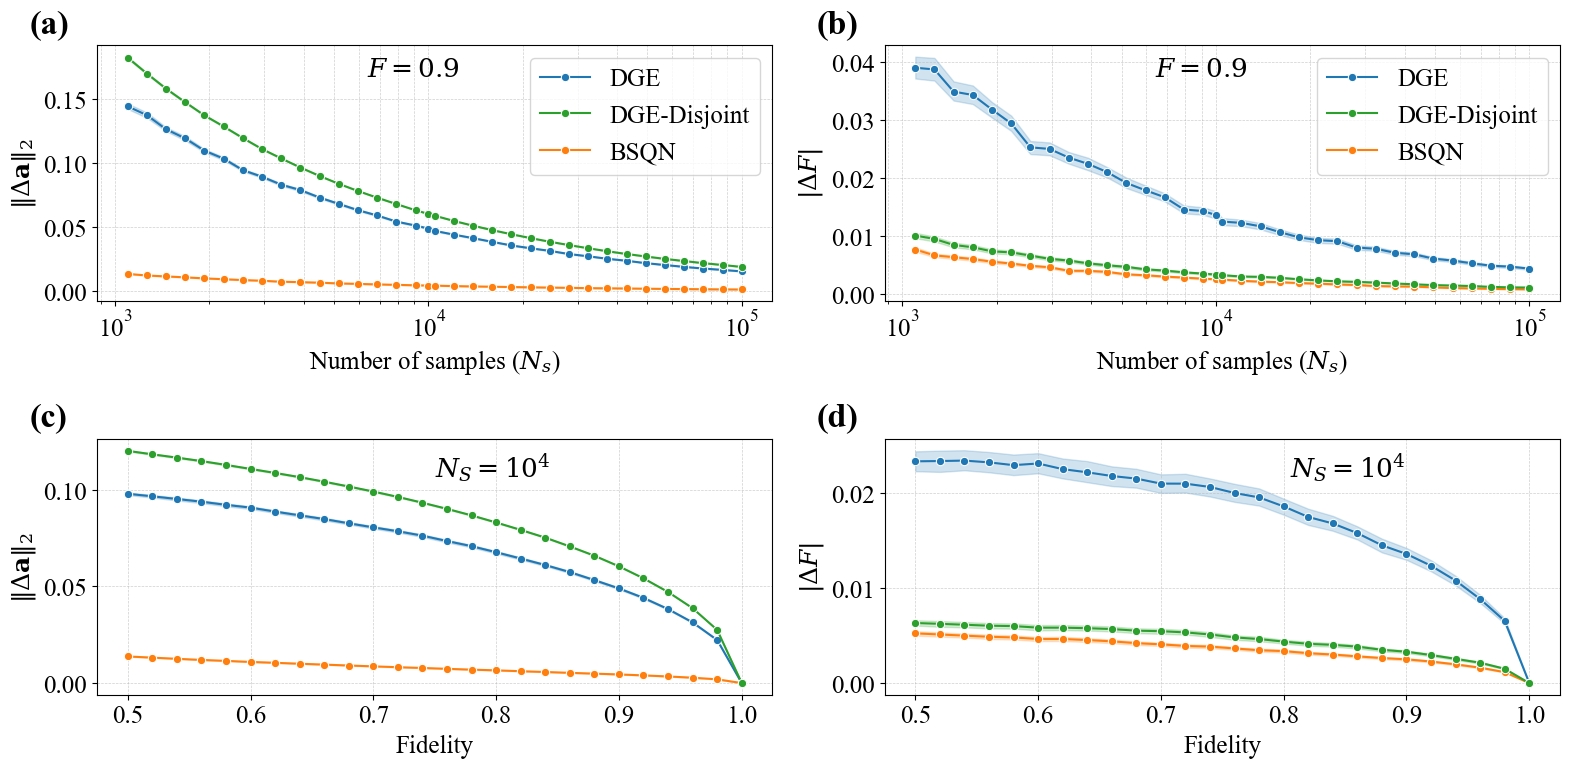

In [6]:
def plot_comparison_results_all(
    tomo_nonoverlapped_df: pd.DataFrame,
    tomo_overlapped_df: pd.DataFrame,
    bell_diag_df: pd.DataFrame,
    num_qubits: int,
    fixed_fidelity: float,
    fixed_shots: int,
    title_fontsize: int = 19,
    label_fontsize: int = 18,
    legend_fontsize: int = 18,
    tick_fontsize: int = 18,
    legend_mapping: dict = None,
    filename_suffix: str = None,
    ):
    """
    Generates a 2x2 comparison plot with customizable fonts and legends.
    """
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['mathtext.fontset'] = 'dejavuserif'
    
    # Combine the two dataframes for easier plotting with seaborn's 'hue'
    combined_df = pd.concat([tomo_overlapped_df, bell_diag_df, tomo_nonoverlapped_df], ignore_index=True)
    # combined_df = pd.concat([tomo_nonoverlapped_df, tomo_overlapped_df], ignore_index=True)
    
    if combined_df.empty:
        print("No data found for plotting.")
        return

    # If a mapping is provided, rename the prefixes for a cleaner legend.
    # Otherwise, use the original prefixes.
    if legend_mapping:
        combined_df['prefix'] = combined_df['prefix'].map(legend_mapping)

    # Filter data for the specified number of qubits
    combined_df = combined_df[combined_df['qubits'] == num_qubits].copy()

    # Filter data for the two main experiment types
    df_exp1 = combined_df[combined_df['input_fidelity'] == fixed_fidelity].copy()
    df_exp1 = df_exp1[df_exp1['total_shots'] <= 10**5].copy()
    df_exp1 = df_exp1[df_exp1['total_shots'] >= 10**3].copy()

    df_exp2 = combined_df[combined_df['total_shots'] == fixed_shots].copy()

    fig, axes = plt.subplots(2, 2, figsize=(16, 8))
    # fig.suptitle(f'Performance comparison between BSQN and DGE on complete graph ($n = {num_qubits}$)', fontsize=22)

    # Add labels (a), (b), (c), (d) to the subplots
    subplot_labels = ['(a)', '(b)', '(c)', '(d)']
    label_font_props = {'fontsize': title_fontsize * 1.3, 'fontweight': 'bold', 'fontfamily': 'Times New Roman'}
    for i, ax in enumerate(axes.flatten()):
        ax.text(-0.1, 1.05, subplot_labels[i], transform=ax.transAxes, **label_font_props)

    # --- Row 1: Varying Shots ---
    ax1, ax2 = axes[0, 0], axes[0, 1]
    
    sns.lineplot(data=df_exp1, x="total_shots", y="delta_a_norm_2", hue="prefix", ax=ax1, marker='o')
    # ax1.set_title(f"Error Norm vs. Number of Samples (Input F={fixed_fidelity})", fontsize=title_fontsize)
    ax1.text(0.4, 0.95, f"$F = {fixed_fidelity}$",
             transform=ax1.transAxes, fontsize=title_fontsize, verticalalignment='top')
    ax1.set_xlabel("Number of samples ($N_s$)", fontsize=label_fontsize)
    ax1.set_ylabel(r"$\Vert\Delta \mathbf{a}\Vert_2$", fontsize=label_fontsize)
    ax1.set_xscale("log")

    sns.lineplot(data=df_exp1, x="total_shots", y="delta_fidelity", hue="prefix", ax=ax2, marker='o')
    # ax2.set_title(f"Fidelity Error vs. Number of Samples (Input F={fixed_fidelity})", fontsize=title_fontsize)
    ax2.text(0.4, 0.95, f"$F = {fixed_fidelity}$",
             transform=ax2.transAxes, fontsize=title_fontsize, verticalalignment='top')
    ax2.set_xlabel("Number of samples ($N_s$)", fontsize=label_fontsize)
    ax2.set_ylabel(r"$\vert\Delta F\vert$", fontsize=label_fontsize)
    ax2.set_xscale("log")

    # --- Row 2: Varying Input Fidelity ---
    ax3, ax4 = axes[1, 0], axes[1, 1]
    
    sns.lineplot(data=df_exp2, x="input_fidelity", y="delta_a_norm_2", hue="prefix", ax=ax3, marker='o')
    # ax3.set_title(f"2-Norm vs. Fidelity (Shots={fixed_shots})", fontsize=title_fontsize)
    ax3.text(0.5, 0.95, f"$N_S = 10^4$",
             transform=ax3.transAxes, fontsize=title_fontsize, verticalalignment='top')
    ax3.set_xlabel("Fidelity", fontsize=label_fontsize)
    ax3.set_ylabel(r"$\Vert\Delta \mathbf{a}\Vert_2$", fontsize=label_fontsize)

    sns.lineplot(data=df_exp2, x="input_fidelity", y="delta_fidelity", hue="prefix", ax=ax4, marker='o')
    # ax4.set_title(f"Estimated Fidelity vs. Input Fidelity (Shots={fixed_shots})", fontsize=title_fontsize)
    ax4.text(0.6, 0.95, f"$N_S = 10^{{{int(np.log10(fixed_shots))}}}$",
             transform=ax4.transAxes, fontsize=title_fontsize, verticalalignment='top')
    ax4.set_xlabel("Fidelity", fontsize=label_fontsize)
    ax4.set_ylabel(r"$\vert\Delta F\vert$", fontsize=label_fontsize)

    for ax in axes.flatten():
        # Set tick font size
        ax.tick_params(axis='x', labelsize=tick_fontsize)
        ax.tick_params(axis='y', labelsize=tick_fontsize)
        ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)

        # Customize legend
        legend = ax.get_legend()
        if legend:
            legend.set_title(None) # This line removes the legend title
            plt.setp(legend.get_texts(), fontsize=legend_fontsize)

    # reorder the labels
    order = [0,2,1]
    handles, labels = ax1.get_legend_handles_labels()
    ax1.legend([handles[idx] for idx in order], [labels[idx] for idx in order])
    ax2.legend([handles[idx] for idx in order], [labels[idx] for idx in order])
    # remove legends for subfigs (c) and (d) because it blocks the figures
    ax3.get_legend().remove()
    ax4.get_legend().remove()

    plt.tight_layout(pad=1)
    
    # Ensure plots directory exists
    os.makedirs("plots", exist_ok=True)
    plot_filename = os.path.join("plots", f"comparison_plot_{num_qubits}q{ '_' + filename_suffix if filename_suffix else ''}.pdf")
    plt.savefig(plot_filename, dpi=300)
    plot_filename = os.path.join("plots", f"comparison_plot_{num_qubits}q{ '_' + filename_suffix if filename_suffix else ''}.png")
    plt.savefig(plot_filename, dpi=300)
    print(f"\nSaved comparison plot to: {plot_filename}")


base_path = 'simulation_data/processed_csv'
dge_overlapped_df = pd.read_csv(f'{base_path}/performance_analysis_dge_overlapped.zip')
dge_non_overlapped_df = pd.read_csv(f'{base_path}/appendix_performance_analysis_dge_non_overlapped.zip')
bsqn_df = pd.read_csv(f'{base_path}/performance_analysis_bsqn.zip')

plot_comparison_results_all(dge_non_overlapped_df, dge_overlapped_df, bsqn_df, 8, 0.9, 10_000, filename_suffix='non-overlapped', legend_mapping={
    'DGE': 'DGE',
    'DGE-Disjoint': 'DGE-Disjoint',
    'BSQN': 'BSQN',
})